# Detection of Malaria using Transfer Learning
### Experiments with (Xception), VGG16, Resnet50

# Getting data from kaggle dataset

In [1]:
! pip install -q kaggle

In [2]:
 ! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d miracle9to9/files1 
#525MB File

 97% 507M/525M [00:03<00:00, 159MB/s]
100% 525M/525M [00:03<00:00, 141MB/s]


In [ ]:
!unzip files1.zip

# Prepare Train and Validation Dataset

In [8]:
#Import Required Libraries

import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.applications.xception import Xception, preprocess_input
from keras.layers import Dense, MaxPool2D, Conv2D, Dropout, Flatten, \
    GlobalAveragePooling2D, BatchNormalization, Activation, MaxPooling2D
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [9]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
#Data Augmentation from the Given Data
datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False,
                             rescale=1/255.0, 
                             validation_split=0.2)

In [11]:
trainDatagen = datagen.flow_from_directory(directory='/content/Malaria Cells/training_set',
                                           target_size=(71,71),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='training')

Found 22048 images belonging to 2 classes.


In [ ]:
type(trainDatagen)

keras.preprocessing.image.DirectoryIterator

In [12]:
valDatagen = datagen.flow_from_directory(directory='/content/Malaria Cells/training_set',
                                           target_size=(71,71),
                                           class_mode = 'binary',
                                           batch_size = 16,
                                           subset='validation')

Found 5510 images belonging to 2 classes.


# **xception Implementation**
---

In [ ]:
#Making instance of Xception without taking its top layer and also making other layers non-trainable
xception_wo_top = Xception(include_top=False, weights='imagenet', input_tensor=None, \
                           input_shape=(71,71,3), pooling=None)

83697664/83683744 [==============================] - 1s 0us/step


In [ ]:
xception_wo_top.summary()

In [ ]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [ ]:
# Defining the architecture of the model

model = Sequential()
model.add(xception_wo_top)
model.add(GlobalAveragePooling2D(input_shape=(7,7,2048)))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(trainDatagen,
                   epochs =20,
                   validation_data = valDatagen,
                   callbacks=[early_stop])

Epoch 1/20
1378/1378 [==============================] - 114s 71ms/step - loss: 0.1712 - accuracy: 0.9441 - val_loss: 0.1465 - val_accuracy: 0.9486
Epoch 2/20
1378/1378 [==============================] - 97s 70ms/step - loss: 0.1273 - accuracy: 0.9590 - val_loss: 0.1625 - val_accuracy: 0.9414
Epoch 3/20
1378/1378 [==============================] - 99s 72ms/step - loss: 0.1134 - accuracy: 0.9621 - val_loss: 0.1545 - val_accuracy: 0.9515
Epoch 4/20
1378/1378 [==============================] - 101s 73ms/step - loss: 0.1103 - accuracy: 0.9628 - val_loss: 0.1731 - val_accuracy: 0.9457
Epoch 5/20
1378/1378 [==============================] - 101s 73ms/step - loss: 0.1015 - accuracy: 0.9660 - val_loss: 0.1531 - val_accuracy: 0.9472
Epoch 6/20
1378/1378 [==============================] - 99s 72ms/step - loss: 0.0964 - accuracy: 0.9674 - val_loss: 0.1454 - val_accuracy: 0.9543
Epoch 7/20
1378/1378 [==============================] - 97s 71ms/step - loss: 0.0929 - accuracy: 0.9677 - val_loss: 0.140

In [ ]:
#PLot the learning curves

def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

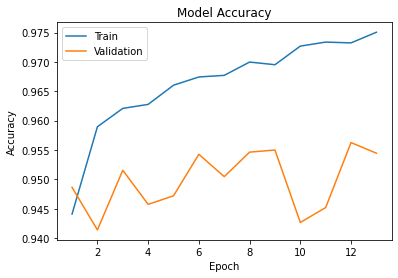

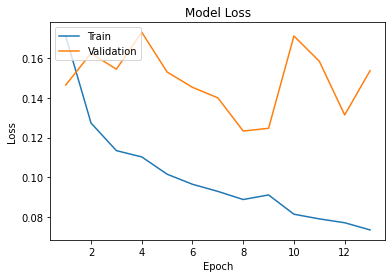

In [ ]:
plotLearningCurve(history,13)

# Saving Model

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#save model to tf format.
model.save("model-Malaria-Detection-xception")

#help(model.save)

INFO:tensorflow:Assets written to: model-Malaria-Detection-xception/assets


In [ ]:
#compress the model.
!tar -czvf model-Malaria-Detection-xception.tar.gz model-Malaria-Detection-xception

In [ ]:
#!tar --help #-czvf model-Malaria-Detection-xception.zip

In [ ]:
# Move file to permanent place so that we can reload it in the next session.
!cp model-Malaria-Detection-xception.tar.gz /content/drive/MyDrive/DS-Data

# Loading Model from Memory

In [ ]:
# Create a new folder and unzip the file located a permanent location into into this new folder.
!tar -xvzf /content/drive/MyDrive/DS-Data/model-Malaria-Detection-xception.tar.gz -C model-Malaria-Detection-xception1

In [24]:
# load the saved model.
loaded_model = tf.keras.models.load_model('model-Malaria-Detection-xception1/model-Malaria-Detection-xception')

#  Convert h5 to tflite

In [28]:
#Save model to h5 format 
loaded_model.save("model-Malaria-Detection-xception2.h5", save_format="h5")

In [31]:
# convert h5 to tflite
import os
def get_file_size(file_path):
    size = os.path.getsize(file_path)
    return size

def convert_bytes(size, unit=None):
    if unit == "KB":
        return print('File size: ' + str(round(size / 1024, 3)) + ' Kilobytes')
    elif unit == "MB":
        return print('File size: ' + str(round(size / (1024 * 1024), 3)) + ' Megabytes')
    else:
        return print('File size: ' + str(size) + ' bytes')

from keras.models import load_model
# Load h5 Model
loaded_model2 = load_model("model-Malaria-Detection-xception2.h5")

TF_LITE_MODEL_FILE_NAME = "model_malaria_pred_tflite_model.tflite"
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model2)
tflite_model = tf_lite_converter.convert()
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)
convert_bytes(get_file_size(TF_LITE_MODEL_FILE_NAME), "KB")

# convert h5 model to tflite 
converter = tf.lite.TFLiteConverter.from_keras_model(loaded_model2)
tflite_model = converter.convert()
# or using another method

# Save the tflite model.
with open(TF_LITE_MODEL_FILE_NAME, 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmplq26gazc/assets


INFO:tensorflow:Assets written to: /tmp/tmplq26gazc/assets


File size: 81740.57 Kilobytes
INFO:tensorflow:Assets written to: /tmp/tmporhq8de6/assets


INFO:tensorflow:Assets written to: /tmp/tmporhq8de6/assets


# Visualize

In [ ]:
import random, glob
import numpy as np
# Lets Take 10 Random Images from each sample
file1 = np.array(random.sample(glob.glob(r"/content/Malaria Cells/training_set/Parasitized/*.png"), 10))
file2 = np.array(random.sample(glob.glob(r"/content/Malaria Cells/training_set/Uninfected/*.png"), 10))
file1 = np.append(file1,file2).tolist()
file1

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

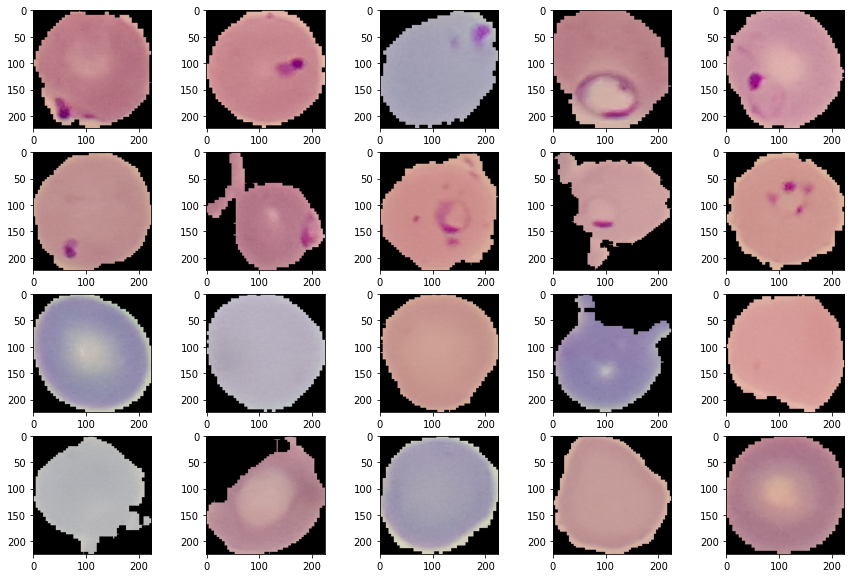

In [ ]:
fig, axs = plt.subplots(4, 5, figsize=(15, 10))
r=0
c=0
for file in file1:
    #print (file)
    img1 = image.load_img(file, target_size=(224, 224))
   
    axs[r][c].imshow(img1)
    c+=1
    if c==5:
        c=0
        r=r+1

## Visualize with Prediction

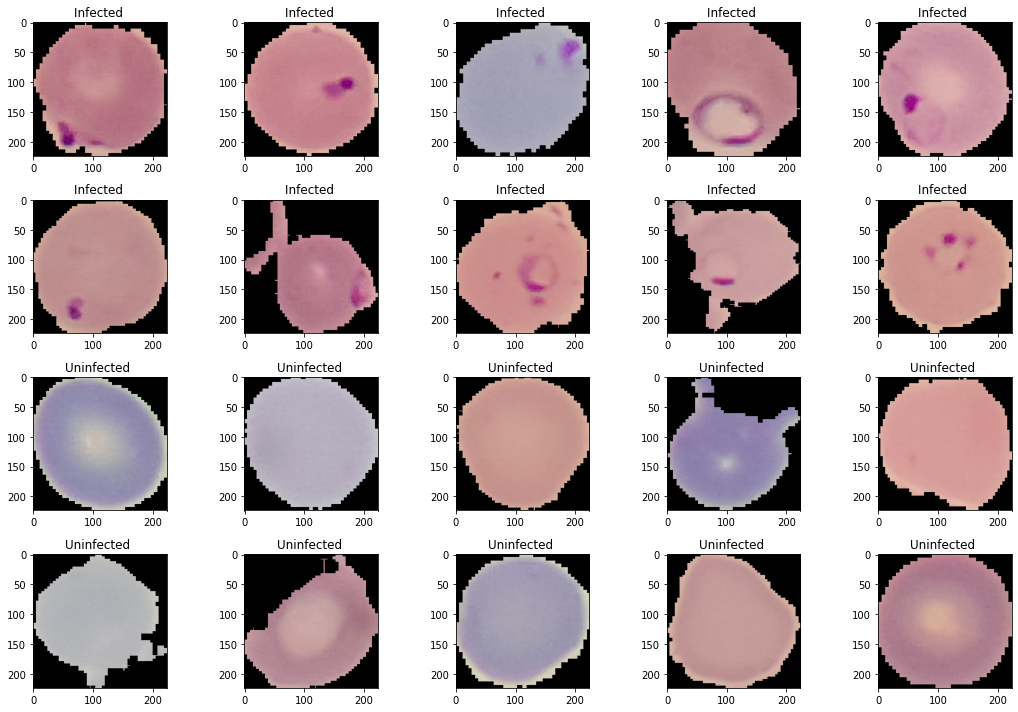

In [ ]:
fig, axs = plt.subplots(4, 5, figsize=(15, 10))
r=0
c=0
for f in file1:
    #print (file)
    img1 = image.load_img(f, target_size=(224, 224))
   
    axs[r][c].imshow(img1)

    img = image.load_img(f, target_size=(71, 71))
    img_array = image.img_to_array(img)
    img_batch = np.expand_dims(img_array, axis=0)

    img_preprocessed = preprocess_input(img_batch)
    prediction = loaded_model.predict(img_preprocessed)
    if prediction<.1:
      axs[r][c].title.set_text("Infected ")
    else:
      axs[r][c].title.set_text("Uninfected ")

    c+=1
    if c==5:
        c=0
        r=r+1

plt.tight_layout()
plt.show()

# Single Prediction

<Figure size 1800x720 with 0 Axes>

<Figure size 1800x720 with 0 Axes>

<Figure size 360x360 with 0 Axes>

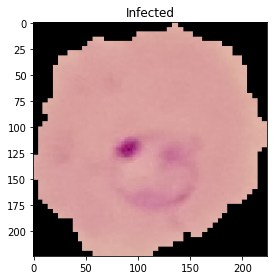

In [ ]:
f = '/content/Malaria Cells/training_set/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png'
plt.figure(figsize=(5,5))

img1 = image.load_img(f, target_size=(224, 224))

img = image.load_img(f, target_size=(71, 71))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

img_preprocessed = preprocess_input(img_batch)
prediction = loaded_model.predict(img_preprocessed)

if prediction<.1:
  title = "Infected"
else:
  title = "Uninfected"

fig, ax1 = plt.subplots(1,1)
ax1.set_title(title)

plt.imshow(img1)
plt.tight_layout()


# Create User Interface

In [ ]:
from tkinter import *
from tkinter import ttk
from tkinter import filedialog
 
class Root(Tk):
    def __init__(self):
        super(Root, self).__init__()
        self.title("Python Tkinter Dialog Widget")
        self.minsize(640, 400)
        self.labelFrame = ttk.LabelFrame(self, text = "Open File")
        self.labelFrame.grid(column = 0, row = 1, padx = 20, pady = 20)
        self.button()
        self.button1() 
 
    def button(self):
        self.button = ttk.Button(self.labelFrame, text = "Browse A File",command = self.fileDialog)
        self.button.grid(column = 1, row = 1)
  
    def fileDialog(self):
        self.filename = filedialog.askopenfilename(initialdir =  "/", title = "Select A File", filetype =
        (("png files","*.png"),("all files","*.*")) )
        self.label = ttk.Label(self.labelFrame, text = "")
        self.label.grid(column = 1, row = 2)
        self.label.configure(text = self.filename)
 
    def button1(self):
        self.button = ttk.Button(self.labelFrame, text = "submit", command = self.get_prediction)
        self.button.grid(column = 1, row = 20)
        
    def get_prediction(self):
        s=model.predict(my_image)
        if(s==[[1.]]):
            self.label.configure(text="non parasitic")
        else:
            self.label.configure(text="parasitic") 
root = Root()
root.mainloop()

# Trying Other Models

# Mobilenet

In [14]:
# Mobilenet
from keras.applications.mobilenet_v2 import MobileNetV2
#Making instance of Xception without taking its top layer and also making other layers non-trainable
mobilenetv2_wo_top = MobileNetV2(include_top=False, weights='imagenet', input_tensor=None, \
                           input_shape=(71,71,3), pooling=None)

9420800/9406464 [==============================] - 0s 0us/step


In [15]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

# Defining the architecture of the model

model = Sequential()
model.add(mobilenetv2_wo_top)
model.add(GlobalAveragePooling2D(input_shape=(7,7,2048)))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 3, 3, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 64)                81984     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
 activation (Activation)     (None, 1)                 0

In [18]:
history = model.fit(trainDatagen,
                   epochs =4,
                   validation_data = valDatagen,
                   callbacks=[early_stop])

Epoch 1/4
1378/1378 [==============================] - 83s 60ms/step - loss: 0.1580 - accuracy: 0.9488 - val_loss: 1.1113 - val_accuracy: 0.8505
Epoch 2/4
1378/1378 [==============================] - 82s 60ms/step - loss: 0.1310 - accuracy: 0.9574 - val_loss: 2.1300 - val_accuracy: 0.8748
Epoch 3/4
1378/1378 [==============================] - 81s 59ms/step - loss: 0.1209 - accuracy: 0.9596 - val_loss: 0.6962 - val_accuracy: 0.9492
Epoch 4/4
1378/1378 [==============================] - 81s 59ms/step - loss: 0.1192 - accuracy: 0.9612 - val_loss: 0.8605 - val_accuracy: 0.8985


In [19]:
model.save("model-Malaria-Detection-mobilenet2")

INFO:tensorflow:Assets written to: model-Malaria-Detection-mobilenet2/assets


INFO:tensorflow:Assets written to: model-Malaria-Detection-mobilenet2/assets


In [20]:
!tar -czvf model-Malaria-Detection-mobilenet2.tar.gz model-Malaria-Detection-mobilenet2

model-Malaria-Detection-mobilenet2/
model-Malaria-Detection-mobilenet2/saved_model.pb
model-Malaria-Detection-mobilenet2/assets/
model-Malaria-Detection-mobilenet2/keras_metadata.pb
model-Malaria-Detection-mobilenet2/variables/
model-Malaria-Detection-mobilenet2/variables/variables.index
model-Malaria-Detection-mobilenet2/variables/variables.data-00000-of-00001


# VGG19

In [ ]:
#Import Required Libraries
from keras.applications.vgg19 import VGG19

In [ ]:
#Making instance of Xception without taking its top layer and also making other layers non-trainable
vgg19_wo_top = VGG19(include_top=False, weights='imagenet', input_tensor=None, input_shape=(71,71,3), pooling=None)

In [ ]:
# Defining the architecture of the model

model = Sequential()
model.add(vgg19_wo_top)
model.add(GlobalAveragePooling2D(input_shape=(7,7,2048)))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(trainDatagen,
                   epochs =20,
                   validation_data = valDatagen,
                   callbacks=[early_stop])

In [ ]:
plotLearningCurve(history,5)

# Resnet50

In [ ]:
#Import Required Libraries
from keras.applications.resnet import ResNet50

In [ ]:
#Making instance of Xception without taking its top layer and also making other layers non-trainable
resent50_wo_top = ResNet50(include_top=False, weights='imagenet', input_tensor=None, input_shape=(71,71,3), pooling=None)

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
# Defining the architecture of the model

model = Sequential()
model.add(resent50_wo_top)
model.add(GlobalAveragePooling2D(input_shape=(7,7,2048)))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dense(units=1))
model.add(Activation('sigmoid'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(trainDatagen,
                   epochs =20,
                   validation_data = valDatagen,
                   callbacks=[early_stop])

In [ ]:
plotLearningCurve(history,6)